# Hough Transform

In Hough space, I can represent my "x vs. y" line as a point in "m vs. b" instead. The Hough Transform is just the conversion from image space to Hough space. So, the characterization of a line in image space will be a single point at the position (m, b) in Hough space. 
<br>

Basically, a line in Image space will be a point in Hough space and vice versa.

<img src ='../img/houghvsimg.png'/>

<br>

OpenCV has a function for HoughLines and below is the call:
<br>
<code>lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)</code>

for a brief overview on how Hough transform works, please take a look at this [video](https://youtu.be/4zHbI-fFIlI)

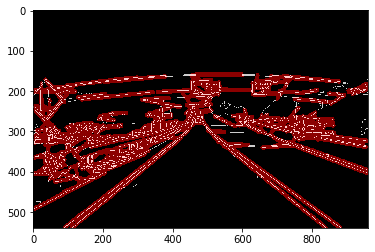

In [30]:
# Lets start with required imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


#Lets read and apply grayscale on image
image = mpimg.imread('../img/exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


# Define Kernel Size and Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)

# Define params for Canny and apply calues
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray,low_threshold,high_threshold)


# Define Hough Transform Parameters here and make a blank the same size as image to draw on

rho = 2
theta = np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 21
line_image = np.copy(image)*0 # to create blank where we'll draw lines


# Run Hough transform on detected Image
lines =  cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

# Iterate over the output lines and draw lines on Blank

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(139,0,0),10)
        
# Create a Color binary image to combine with line image
color_edges = np.dstack((masked_edges,masked_edges,masked_edges))

#Draw the lines on the edge image

combo = cv2.addWeighted(color_edges,0.8,line_image,1,0)
plt.imshow(combo, interpolation='nearest',aspect= 'auto')

plt.imsave('../img/Hough.jpg',combo)